In [53]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

df=pd.read_excel("CreditCardBalance.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   24672 non-null  int64  
 1   CODE_GENDER          24672 non-null  object 
 2   FLAG_OWN_CAR         24672 non-null  object 
 3   FLAG_OWN_REALTY      24672 non-null  object 
 4   CNT_CHILDREN         24672 non-null  int64  
 5   AMT_INCOME_TOTAL     24672 non-null  float64
 6   NAME_INCOME_TYPE     24672 non-null  object 
 7   NAME_EDUCATION_TYPE  24672 non-null  object 
 8   NAME_FAMILY_STATUS   24672 non-null  object 
 9   NAME_HOUSING_TYPE    24672 non-null  object 
 10  AGE                  24672 non-null  float64
 11  CURRENT EMPLOY       24672 non-null  int64  
 12  FLAG_MOBIL           24672 non-null  int64  
 13  FLAG_WORK_PHONE      24672 non-null  int64  
 14  FLAG_PHONE           24672 non-null  int64  
 15  FLAG_EMAIL           24672 non-null 

In [6]:
df.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,NaN,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,NaN,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,Security staff,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1
5,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1
6,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,61.545205,0,1,0,0,0,NaN,1,0,0
7,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.224658,1,1,1,1,1,Accountants,2,0,0
8,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.224658,1,1,1,1,1,Accountants,2,X,1
9,5008821,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.706849,1,1,0,0,0,Laborers,2,X,1


In [8]:
df.replace(np.nan, "Unknown", inplace = True)

df.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,Unknown,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,Unknown,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,Security staff,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1
5,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1
6,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,61.545205,0,1,0,0,0,Unknown,1,0,0
7,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.224658,1,1,1,1,1,Accountants,2,0,0
8,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.224658,1,1,1,1,1,Accountants,2,X,1
9,5008821,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.706849,1,1,0,0,0,Laborers,2,X,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   24672 non-null  int64  
 1   CODE_GENDER          24672 non-null  object 
 2   FLAG_OWN_CAR         24672 non-null  object 
 3   FLAG_OWN_REALTY      24672 non-null  object 
 4   CNT_CHILDREN         24672 non-null  int64  
 5   AMT_INCOME_TOTAL     24672 non-null  float64
 6   NAME_INCOME_TYPE     24672 non-null  object 
 7   NAME_EDUCATION_TYPE  24672 non-null  object 
 8   NAME_FAMILY_STATUS   24672 non-null  object 
 9   NAME_HOUSING_TYPE    24672 non-null  object 
 10  AGE                  24672 non-null  float64
 11  CURRENT EMPLOY       24672 non-null  int64  
 12  FLAG_MOBIL           24672 non-null  int64  
 13  FLAG_WORK_PHONE      24672 non-null  int64  
 14  FLAG_PHONE           24672 non-null  int64  
 15  FLAG_EMAIL           24672 non-null 

In [10]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPROVED
count,2.467200e+04,24672.000000,2.467200e+04,24672.000000,24672.000000,24672.0,24672.000000,24672.000000,24672.000000,24672.000000,24672.000000
mean,5.078863e+06,0.422584,1.870750e+05,43.897269,0.830537,1.0,0.227910,0.294423,0.091683,2.184257,0.707725
std,4.153533e+04,0.753254,1.020948e+05,11.456851,0.375168,0.0,0.419493,0.455792,0.288584,0.912098,0.454817
min,5.008804e+06,0.000000,2.700000e+04,20.517808,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045511e+06,0.000000,1.215000e+05,34.360959,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.069454e+06,0.000000,1.575000e+05,42.884932,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,1.000000
75%,5.115437e+06,1.000000,2.250000e+05,53.295890,1.000000,1.0,0.000000,1.000000,0.000000,3.000000,1.000000
max,5.150487e+06,19.000000,1.575000e+06,68.909589,1.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


In [11]:
df["CNT_CHILDREN"].std()

0.7532544881839415

In [12]:
df["CNT_CHILDREN"].min()

0

In [13]:
df["CNT_CHILDREN"].max()

19

In [ ]:
cnt_children_range = df["CNT_CHILDREN"].max - df["CNT_CHILDREN"].max

In [14]:
children_range = df["CNT_CHILDREN"].max() - df["CNT_CHILDREN"].min()

print(children_range)

19


In [15]:
dfz = df.copy()

print(dfz.shape)

(24672, 20)


In [16]:
dfz["zscore-children"] = np.abs(stats.zscore(dfz["CNT_CHILDREN"]))

dfz.head(23)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED,zscore-children
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,1,0,0,Unknown,2,C,1,0.561023
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,1,0,0,Unknown,2,C,1,0.561023
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,0,Security staff,2,C,1,0.561023
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,0,1,1,Sales staff,1,0,0,0.561023
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,0,1,1,Sales staff,1,C,1,0.561023
5,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,0,1,1,Sales staff,1,C,1,0.561023
6,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,1,0,0,0,Unknown,1,0,0,0.561023
7,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,1,1,Accountants,2,0,0,0.561023
8,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,1,1,Accountants,2,X,1,0.561023
9,5008821,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,0,Laborers,2,X,1,0.561023


In [ ]:
z_outliers = dfz.loc[dfz["CNT_CHILDREN"] > 3].index

print(z_outliers)



In [17]:
dfz.iloc[[1405, 3495, 3496, 3497]]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED,zscore-children
1405,5113188,M,Y,Y,4,292500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,0,Laborers,6,0,0,4.749375
3495,5028252,M,Y,N,4,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,0,Security staff,6,C,1,4.749375
3496,5028253,M,Y,N,4,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,0,Security staff,6,0,0,4.749375
3497,5028254,M,Y,N,4,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,1,0,0,0,Security staff,6,0,0,4.749375


In [ ]:
dfz.iloc[[4742, 8460, 9577, 17364]]

In [20]:
dfz = dfz.drop(z_outliers)

print(dfz.shape)

NameError: name 'z_outliers' is not defined

In [ ]:
dfz.iloc[[4742, 8460, 9577, 17364]]

In [21]:
dfz.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPROVED,zscore-children
count,2.467200e+04,24672.000000,2.467200e+04,24672.000000,24672.000000,24672.0,24672.000000,24672.000000,24672.000000,24672.000000,24672.000000,24672.000000
mean,5.078863e+06,0.422584,1.870750e+05,43.897269,0.830537,1.0,0.227910,0.294423,0.091683,2.184257,0.707725,0.786551
std,4.153533e+04,0.753254,1.020948e+05,11.456851,0.375168,0.0,0.419493,0.455792,0.288584,0.912098,0.454817,0.617538
min,5.008804e+06,0.000000,2.700000e+04,20.517808,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.561023
25%,5.045511e+06,0.000000,1.215000e+05,34.360959,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.561023
50%,5.069454e+06,0.000000,1.575000e+05,42.884932,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,1.000000,0.561023
75%,5.115437e+06,1.000000,2.250000e+05,53.295890,1.000000,1.0,0.000000,1.000000,0.000000,3.000000,1.000000,0.766577
max,5.150487e+06,19.000000,1.575000e+06,68.909589,1.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000,24.663367


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   24672 non-null  int64  
 1   CODE_GENDER          24672 non-null  object 
 2   FLAG_OWN_CAR         24672 non-null  object 
 3   FLAG_OWN_REALTY      24672 non-null  object 
 4   CNT_CHILDREN         24672 non-null  int64  
 5   AMT_INCOME_TOTAL     24672 non-null  float64
 6   NAME_INCOME_TYPE     24672 non-null  object 
 7   NAME_EDUCATION_TYPE  24672 non-null  object 
 8   NAME_FAMILY_STATUS   24672 non-null  object 
 9   NAME_HOUSING_TYPE    24672 non-null  object 
 10  AGE                  24672 non-null  float64
 11  CURRENT EMPLOY       24672 non-null  int64  
 12  FLAG_MOBIL           24672 non-null  int64  
 13  FLAG_WORK_PHONE      24672 non-null  int64  
 14  FLAG_PHONE           24672 non-null  int64  
 15  FLAG_EMAIL           24672 non-null 

In [23]:
df["CODE_GENDER"].value_counts()

F    16377
M     8295
Name: CODE_GENDER, dtype: int64

In [24]:
df["CURRENT EMPLOY"].value_counts()

1    20491
0     4181
Name: CURRENT EMPLOY, dtype: int64

In [25]:
df["APPROVED"].value_counts()

1    17461
0     7211
Name: APPROVED, dtype: int64

In [26]:
df["APPROVED"].groupby(df["CODE_GENDER"]).mean()

CODE_GENDER
F    0.705318
M    0.712477
Name: APPROVED, dtype: float64

In [27]:
pd.crosstab(df["APPROVED"], df["CODE_GENDER"])

CODE_GENDER,F,M
APPROVED,,
0,4826,2385
1,11551,5910


In [28]:
df["APPROVED"].groupby(df["CURRENT EMPLOY"]).mean()

CURRENT EMPLOY
0    0.699115
1    0.709482
Name: APPROVED, dtype: float64

In [29]:
pd.crosstab(df["APPROVED"], df["CURRENT EMPLOY"]).mean()

CURRENT EMPLOY
0     2090.5
1    10245.5
dtype: float64

In [30]:
pd.crosstab(df["APPROVED"], df["AMT_INCOME_TOTAL"]).mean()

AMT_INCOME_TOTAL
27000.0      1.5
29250.0      1.0
30150.0      1.5
31500.0      4.0
31531.5      0.5
            ... 
945000.0     1.5
990000.0     1.5
1125000.0    1.5
1350000.0    1.5
1575000.0    2.5
Length: 255, dtype: float64

In [31]:
df.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPROVED
ID,1.000000,0.026430,-0.021695,-0.046132,0.024740,NaN,0.080467,0.012626,-0.049171,0.020216,-0.005325
CNT_CHILDREN,0.026430,1.000000,0.029538,-0.325752,0.209672,NaN,0.039228,-0.025578,0.014006,0.874450,-0.014996
AMT_INCOME_TOTAL,-0.021695,0.029538,1.000000,-0.066397,0.167748,NaN,-0.031761,0.016857,0.093420,0.023022,-0.009696
AGE,-0.046132,-0.325752,-0.066397,1.000000,-0.612260,NaN,-0.180922,0.030642,-0.105493,-0.292729,-0.004866
CURRENT EMPLOY,0.024740,0.209672,0.167748,-0.612260,1.000000,NaN,0.241812,0.010900,0.083235,0.215985,0.008552
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.080467,0.039228,-0.031761,-0.180922,0.241812,NaN,1.000000,0.303036,-0.031652,0.059104,0.011358
FLAG_PHONE,0.012626,-0.025578,0.016857,0.030642,0.010900,NaN,0.303036,1.000000,0.014488,-0.014766,0.002363
FLAG_EMAIL,-0.049171,0.014006,0.093420,-0.105493,0.083235,NaN,-0.031652,0.014488,1.000000,0.006192,-0.009844
CNT_FAM_MEMBERS,0.020216,0.874450,0.023022,-0.292729,0.215985,NaN,0.059104,-0.014766,0.006192,1.000000,0.002802


In [ ]:
df.drop (columns = "FLAG_MOBIL")

In [32]:
df.drop(columns = "FLAG_MOBIL",inplace=True)

df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,0,0,Unknown,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,0,0,Unknown,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,0,0,0,Security staff,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,0,1,1,Sales staff,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,0,1,1,Sales staff,1,C,1


In [ ]:
df.drop (columns = ["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"])

In [ ]:
df.drop (columns = ["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]), inplace=True

In [ ]:
df.drop (columns = ["FLAG_MOBIL", "FLAG_WORK_PHONE", "CNT_CHILDREN", "CNT_FAM_MEMBERS"])

df.head()

In [ ]:
df.head()

In [33]:
df.drop(columns = "FLAG_PHONE",inplace=True)

In [ ]:
df.drop(columns = "FLAG_EMAIL",inplace=True)

In [34]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,0,Unknown,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,0,Unknown,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,0,0,Security staff,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,0,1,Sales staff,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,0,1,Sales staff,1,C,1


In [35]:
df.drop(columns = "FLAG_WORK_PHONE", inplace=True)

In [36]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,0,Unknown,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,0,Unknown,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,0,Security staff,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,Sales staff,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,Sales staff,1,C,1


In [37]:
df.drop(columns = ["NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"],inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,AGE,CURRENT EMPLOY,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,32.890411,1,0,Unknown,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,32.890411,1,0,Unknown,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,58.832877,1,0,Security staff,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,52.356164,1,1,Sales staff,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,52.356164,1,1,Sales staff,1,C,1


In [ ]:
df.head()

In [38]:
df.drop(columns = ["FLAG_OWN_CAR", "FLAG_OWN_REALTY"],inplace=True)

In [39]:
df.head()

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,AGE,CURRENT EMPLOY,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,0,427500.0,Working,Higher education,32.890411,1,0,Unknown,2,C,1
1,5008805,M,0,427500.0,Working,Higher education,32.890411,1,0,Unknown,2,C,1
2,5008806,M,0,112500.0,Working,Secondary / secondary special,58.832877,1,0,Security staff,2,C,1
3,5008808,F,0,270000.0,Commercial associate,Secondary / secondary special,52.356164,1,1,Sales staff,1,0,0
4,5008810,F,0,270000.0,Commercial associate,Secondary / secondary special,52.356164,1,1,Sales staff,1,C,1


In [40]:
df.drop(columns = ["OCCUPATION_TYPE", "CNT_FAM_MEMBERS"],inplace=True)

df.head()

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,AGE,CURRENT EMPLOY,FLAG_EMAIL,STATUS,APPROVED
0,5008804,M,0,427500.0,Working,Higher education,32.890411,1,0,C,1
1,5008805,M,0,427500.0,Working,Higher education,32.890411,1,0,C,1
2,5008806,M,0,112500.0,Working,Secondary / secondary special,58.832877,1,0,C,1
3,5008808,F,0,270000.0,Commercial associate,Secondary / secondary special,52.356164,1,1,0,0
4,5008810,F,0,270000.0,Commercial associate,Secondary / secondary special,52.356164,1,1,C,1


In [56]:
df.rename(columns={'CURRENT EMPLOY':'EMPLOYED'}, inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,NaN,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,NaN,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,Security staff,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1


In [43]:
# Build a Logistic Regression Model
mod1 = sm.logit('APPROVED ~ AMT_INCOME_TOTAL + EMPLOYED + AGE + NAME_INCOME_TYPE', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.602426
         Iterations 7


In [44]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               APPROVED   No. Observations:                24672
Model:                          Logit   Df Residuals:                    24664
Method:                           MLE   Df Model:                            7
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                0.002896
Time:                        18:57:28   Log-Likelihood:                -14863.
converged:                       True   LL-Null:                       -14906.
Covariance Type:            nonrobust   LLR p-value:                 6.956e-16
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.2747      0.527     -4.314      0.000      -3.308      -1.241
NAME_INCOME_TYPE[T.Pensioner]         3.2358      0.524      6.172      0.000       2.208       4.263
NAME_INCOME_TYPE[T.State servant]    -0.0213      0.058     -0.371      0.711      -0.134       0.091
NAME_INCOME_TYPE[T.Student]           0.3516      0.802      0.438      0.661      -1.221       1.924
NAME_INCOME_TYPE[T.Working]          -0.0033      0.035     -0.095      0.924      -0.072       0.066
AMT_INCOME_TOTAL                  -2.095e-07    1.4e-07     -1.502      0.133   -4.83e-07    6.39e-08
EMPLOYED                              3.2496      0.522      6.222      0.000       2.226       4.273
AGE                                  -0.0009      0.002     -0.600      0.548      -0.004       0.002
=====================================================================================================
"""

In [45]:
mod1.params


Intercept                           -2.274654e+00
NAME_INCOME_TYPE[T.Pensioner]        3.235787e+00
NAME_INCOME_TYPE[T.State servant]   -2.134992e-02
NAME_INCOME_TYPE[T.Student]          3.515993e-01
NAME_INCOME_TYPE[T.Working]         -3.349328e-03
AMT_INCOME_TOTAL                    -2.095327e-07
EMPLOYED                             3.249644e+00
AGE                                 -9.343998e-04
dtype: float64

In [46]:
df_odds = pd.DataFrame(np.exp(mod1.params), columns = ["OR"])

In [47]:
df_odds["pvalue"] = mod1.pvalues

In [50]:
df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

In [51]:
print (df_odds)

                                          OR        pvalue      Sig
Intercept                           0.102833  1.604558e-05      Sig
NAME_INCOME_TYPE[T.Pensioner]      25.426377  6.731667e-10      Sig
NAME_INCOME_TYPE[T.State servant]   0.978876  7.105219e-01  Not Sig
NAME_INCOME_TYPE[T.Student]         1.421339  6.612514e-01  Not Sig
NAME_INCOME_TYPE[T.Working]         0.996656  9.241962e-01  Not Sig
AMT_INCOME_TOTAL                    1.000000  1.331592e-01  Not Sig
EMPLOYED                           25.781159  4.903200e-10      Sig
AGE                                 0.999066  5.483814e-01  Not Sig


In [58]:
pd.crosstab(df["APPROVED"], df["EMPLOYED"], margins = True)

EMPLOYED,0,1,All
APPROVED,,,
0,1258,5953,7211
1,2923,14538,17461
All,4181,20491,24672


<AxesSubplot:xlabel='APPROVED', ylabel='count'>

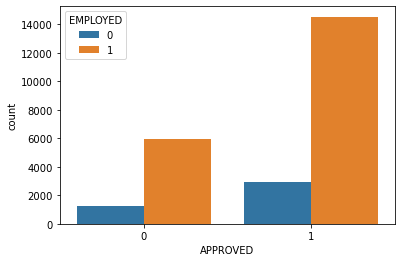

In [59]:
#sns.countplot(data = df, x = "survived", hue = "sex")
#plt.title('survival by sex')

sns.countplot(data = df, x = "APPROVED", hue = "EMPLOYED")

In [60]:
pd.crosstab(df["APPROVED"], df["NAME_INCOME_TYPE"], margins = True)

NAME_INCOME_TYPE,Commercial associate,Pensioner,State servant,Student,Working,All
APPROVED,,,,,,
0,1713,1218,576,2,3702,7211
1,4136,2932,1377,7,9009,17461
All,5849,4150,1953,9,12711,24672


<AxesSubplot:xlabel='APPROVED', ylabel='count'>

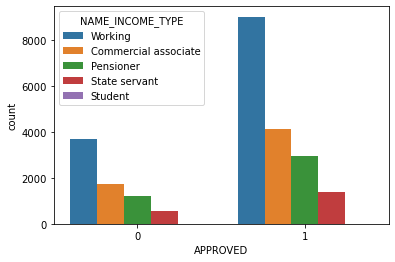

In [61]:
#sns.countplot(data = df, x = "survived", hue = "sex")
#plt.title('survival by sex')

sns.countplot(data = df, x = "APPROVED", hue = "NAME_INCOME_TYPE")

In [62]:
pd.crosstab(df["AMT_INCOME_TOTAL"], df["APPROVED"], margins = True)

APPROVED,0,1,All
AMT_INCOME_TOTAL,,,
27000.0,0,3,3
29250.0,2,0,2
30150.0,1,2,3
31500.0,2,6,8
31531.5,0,1,1
...,...,...,...
990000.0,3,0,3
1125000.0,1,2,3
1350000.0,1,2,3


KeyboardInterrupt: 

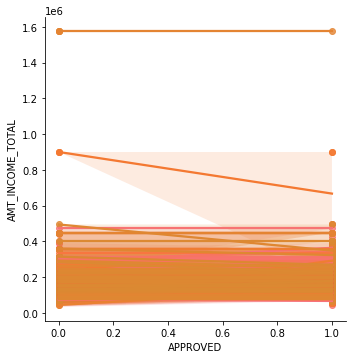

In [68]:
sns.lmplot(data = df, x = "APPROVED", y = "AMT_INCOME_TOTAL", hue ="AGE")

In [ ]:
plt.figure(figsize=10,10))

sns.regplot(x = df["AMT_INCOME_TOTAL"], y = df["APPROVED"], fit_reg = True)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,NaN,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,NaN,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,Security staff,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24667,5149828,M,Y,Y,4,315000.0,Working,Secondary / secondary special,Married,House / apartment,47.528767,1,1,0,0,0,Managers,2,5,0
24668,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,33.936986,1,1,0,1,1,Medicine staff,2,C,1
24669,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,33.936986,1,1,0,1,1,Medicine staff,2,C,1
24670,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.200000,1,1,0,0,0,Sales staff,2,2,0


In [70]:
df.to_excel("creditcardapproval_clean.xlsx")
